<a href="https://colab.research.google.com/github/AlphaKermit-999/AI-Topics-learnings/blob/main/Advanced_AI/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from keras.datasets import cifar10

In [19]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

In [20]:
xtrain.shape

(50000, 32, 32, 3)

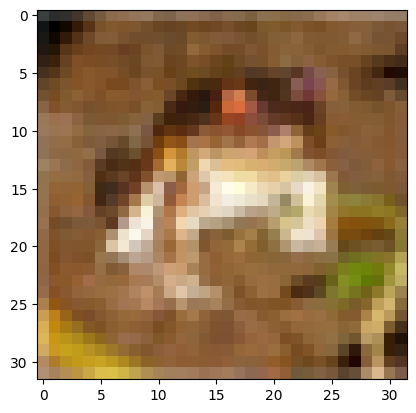

In [21]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[0])

In [22]:
xtrain = xtrain.astype('float')/255
xtest = xtest.astype('float')/255

In [23]:
ytrain

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [24]:
from tensorflow.keras.utils import to_categorical
ytrain1 = to_categorical(ytrain, num_classes=10)
ytest1 = to_categorical(ytest, num_classes=10)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [26]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │       163,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,134 (969.27 KB)

 Trainable params: 248,134 (969.27 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(xtrain, ytrain1, epochs=3, batch_size=100, validation_data=(xtest, ytest1))

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.1809 - loss: 2.1378 - val_accuracy: 0.2973 - val_loss: 1.7649
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.3236 - loss: 1.6889 - val_accuracy: 0.3428 - val_loss: 1.5786
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.3714 - loss: 1.5330 - val_accuracy: 0.3934 - val_loss: 1.4955


In [30]:
model.evaluate(xtest, ytest1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3947 - loss: 1.4941


[1.495540976524353, 0.39340001344680786]

In [31]:
model.save("model_epoch3.h5")

In [32]:
from tensorflow.keras.models import load_model
m2 = load_model("model_epoch3.h5")

In [33]:
from PIL import Image
import numpy as np

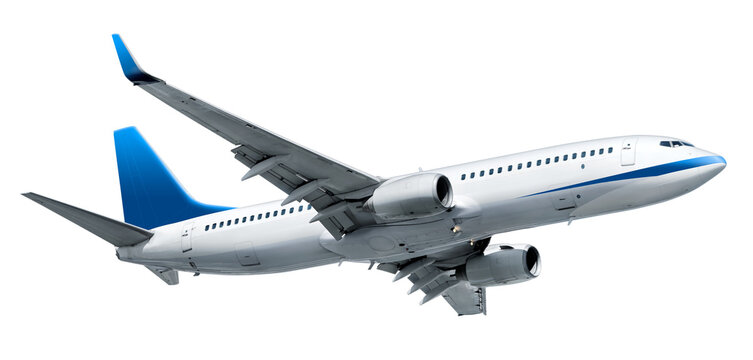

In [34]:
img = Image.open("airplane_sample.jpg")
img

In [35]:
img.size

(753, 360)

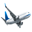

In [36]:
im = img.resize((32,32))
im

In [37]:
im.size

(32, 32)

In [38]:
im = np.expand_dims(im, axis=0)

In [39]:
results = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [40]:
pred = np.argmax(m2.predict(im)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


In [41]:
results[pred]

'airplane'